# Exercise 6

## Predict rating using LSTM


In [9]:
import pandas as pd

In [10]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [11]:
X = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [12]:
X

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."
...,...
8417,""" our marriage , their wedding . "" it ' s l..."
1592,"the wandering barbarian , conan , alongside ..."
1723,"like a tale spun by scheherazade , kismet fol..."
7605,"mrs . brisby , a widowed mouse , lives in a..."


In [13]:
y

,rating
3107,1
900,0
6724,1
4704,1
2582,1
...,...
8417,0
1592,0
1723,0
7605,1


# Exercise 6.1

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [14]:
!pip install wget
!pip install livelossplot --quiet

In [15]:
import pandas as pd
import numpy as np
import wget
import os
from zipfile import ZipFile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec
import warnings


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))#SET STOPWORDS
def preprocess(text):
    text = text.lower() #LOWERCASE
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [17]:
X = X.tolist()

In [18]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [19]:
# Max len
max_len = 2000
X = [x[:max_len] for x in X]
# Convert characters to int and pad PAD SEQUENCE
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [20]:
len(X)

7895

In [21]:
X_pad = pad_sequences(X, maxlen=max_len)

In [22]:
X_pad

array([[ 0,  0,  0, ..., 27,  7, 26],
       [ 0,  0,  0, ..., 38, 29, 34],
       [ 0,  0,  0, ..., 15, 38, 45],
       ...,
       [ 0,  0,  0, ..., 12, 14, 43],
       [ 0,  0,  0, ..., 44,  4, 38],
       [ 0,  0,  0, ..., 29, 38, 38]], dtype=int32)

In [23]:
# split data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, stratify = y, test_size = 0.3, random_state = 18)

In [24]:
print(X_train.shape)
print(y_train.shape)

(5526, 2000)
(5526,)


# Exercise 6.2

Create a SimpleRNN neural network to predict the rating of a movie

Calculate the testing set accuracy

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supongamos que X_train tiene forma (150, n_features) y y_train es un vector de 150 elementos con valores 0 o 1
# Donde n_features es el número de características de los datos

# Crear el modelo secuencial
model = Sequential()

# Agregar la capa de entrada y la primera capa oculta
model.add(Dense(units=45, activation='relu', input_dim=max_len))

# Agregar una segunda capa oculta
model.add(Dense(units=12, activation='relu'))

# Agregar una segunda capa oculta
model.add(Dense(units=20, activation='tanh'))

# Agregar una segunda capa oculta
model.add(Dense(units=16, activation='elu'))


# Agregar la capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5457 - loss: 0.6978 - val_accuracy: 0.5741 - val_loss: 0.6805
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5615 - loss: 0.6841 - val_accuracy: 0.5428 - val_loss: 0.6911
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5701 - loss: 0.6859 - val_accuracy: 0.4719 - val_loss: 0.7004
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5426 - loss: 0.6871 - val_accuracy: 0.5382 - val_loss: 0.6918
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5496 - loss: 0.6873 - val_accuracy: 0.5488 - val_loss: 0.6798
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5460 - loss: 0.6812 - val_accuracy: 0.5551 - val_loss: 0.6871
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5520 - loss: 0.6862 - val_accuracy: 0.5399 - val_loss: 0.6905
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5497 - loss: 0.6877 - val_accu

In [23]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5689 - loss: 0.7169
Test accuracy: 0.5694385766983032


##SIMPLE KERAS

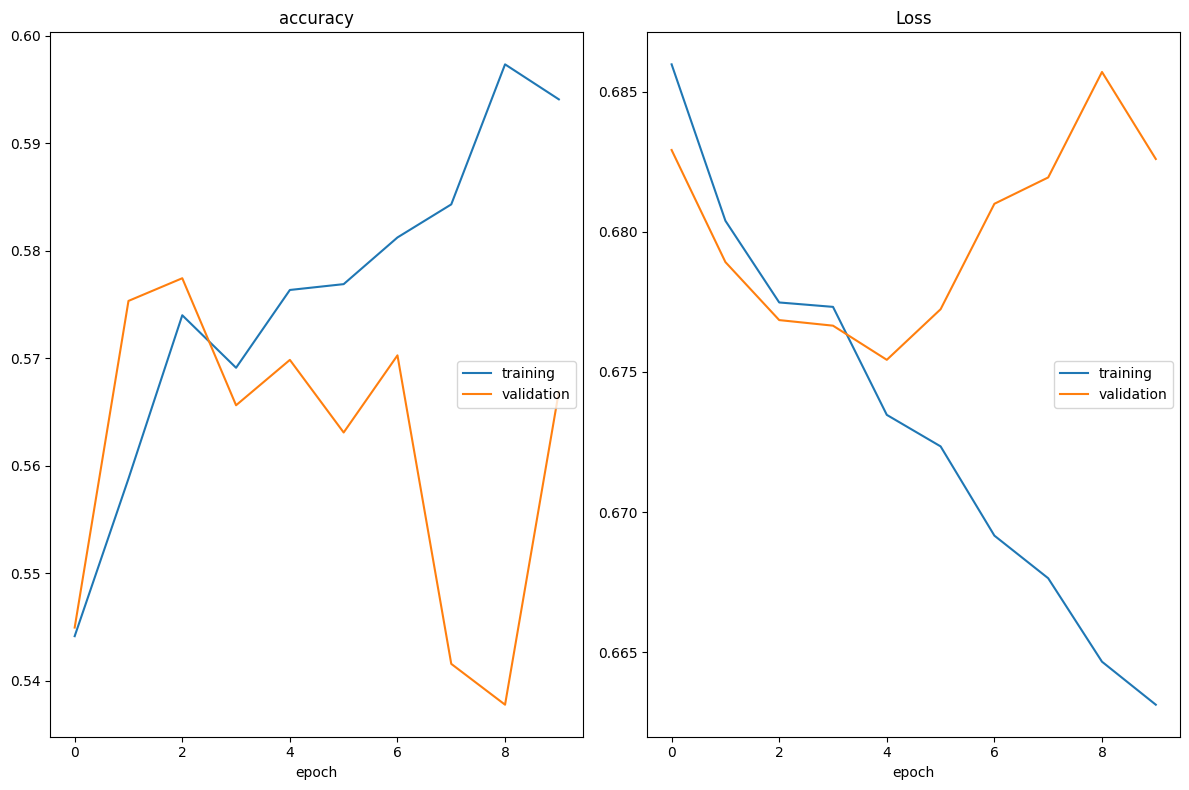

accuracy
	training         	 (min:    0.544, max:    0.597, cur:    0.594)
	validation       	 (min:    0.538, max:    0.577, cur:    0.567)
Loss
	training         	 (min:    0.663, max:    0.686, cur:    0.663)
	validation       	 (min:    0.675, max:    0.686, cur:    0.683)
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 374ms/step - accuracy: 0.5840 - loss: 0.6651 - val_accuracy: 0.5669 - val_loss: 0.6826


In [24]:
import keras.optimizers as opts
from keras.layers import Flatten

K.clear_session()

# Definir el modelo secuencial
model = Sequential()

# Agregar la capa de Embedding
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))

# Aplanar la salida de la capa Embedding
model.add(Flatten())

# Agregar la capa de salida
model.add(Dense(1, activation='sigmoid'))

# Definir el optimizador con la tasa de aprendizaje ajustada
op = opts.SGD(learning_rate=0.02)

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])


##TD-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
features = vect.vocabulary_.keys()
X_dtm.shape

(7895, 38370)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.33, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, stratify = y, test_size = 0.3, random_state = 42)

In [28]:
print(X_train.shape)
print(y_train.shape)

(5526, 38370)
(5526,)


In [29]:
print(X_train.shape[1])

38370


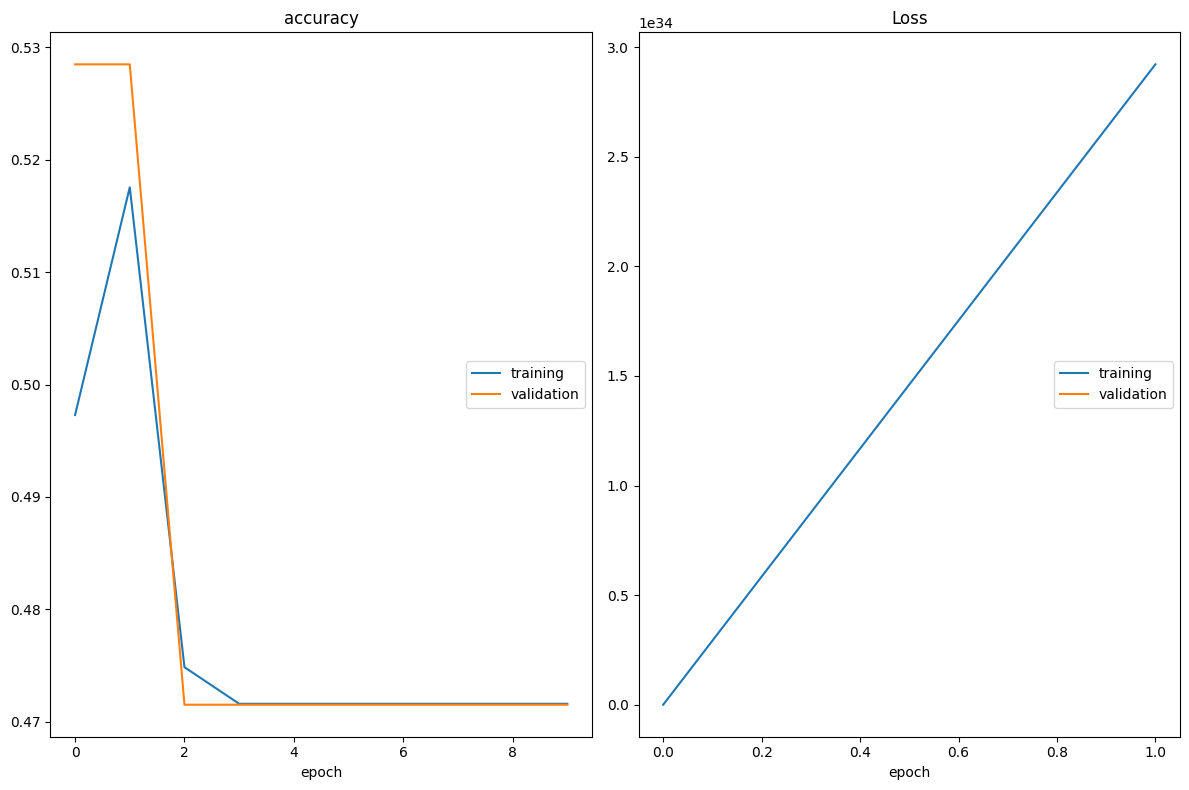

accuracy
	training         	 (min:    0.472, max:    0.518, cur:    0.472)
	validation       	 (min:    0.472, max:    0.528, cur:    0.472)
Loss
	training         	 (min: 201163589401182208.000, max: 29213889495567517748247253544337408.000, cur:      nan)
	validation       	 (min: 11294888227468476416.000, max:      inf, cur:      nan)
44/44 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.4717 - loss: nan - val_accuracy: 0.4715 - val_loss: nan


In [30]:
import keras.optimizers as opts
from keras.layers import Flatten
K.clear_session()

# Definir el modelo
model = Sequential()

# Capa de Embedding
model.add(Embedding(len(vocabulary) + 1, 128, input_length=38370))

# Aplanar la salida de la capa Embedding
model.add(Flatten())

# Capa de salida para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Optimizer
op = opts.SGD(learning_rate=0.02)

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

# Convertir los datos a formato denso (si es necesario)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Entrenar el modelo
model.fit(X_train_dense, y_train, validation_data=(X_test_dense, y_test),
          batch_size=128, epochs=10, verbose=1, callbacks=[PlotLossesKeras()])


# Exercise 6.3

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [3]:
!pip install livelossplot --quiet

In [4]:
import keras
from keras import backend as K

In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences

In [6]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [25]:
K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=1000))

# Desactivar cuDNN para LSTM
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


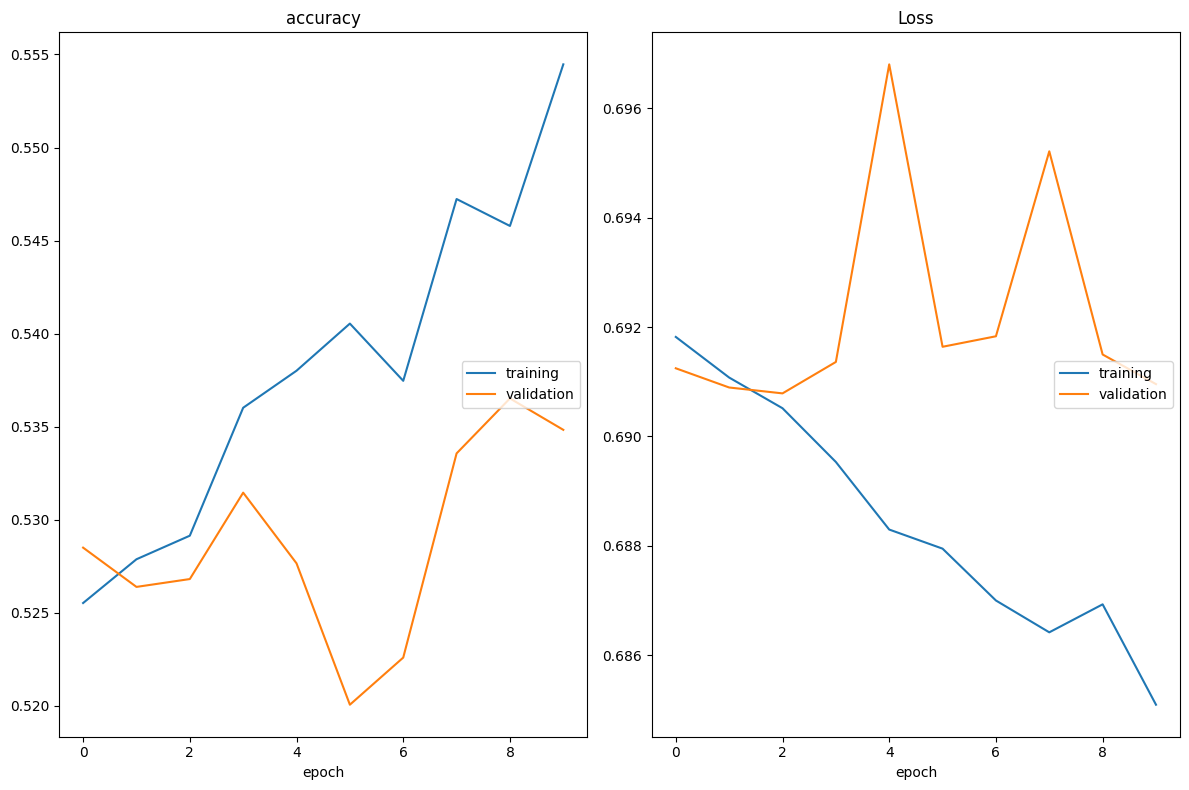

accuracy
	training         	 (min:    0.526, max:    0.554, cur:    0.554)
	validation       	 (min:    0.520, max:    0.537, cur:    0.535)
Loss
	training         	 (min:    0.685, max:    0.692, cur:    0.685)
	validation       	 (min:    0.691, max:    0.697, cur:    0.691)
44/44 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.5467 - loss: 0.6867 - val_accuracy: 0.5348 - val_loss: 0.6910


In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Exercise 6.4

Create a GRU neural network to predict the rating of a movie

Calculate the testing set accuracy

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense

In [29]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(GRU(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

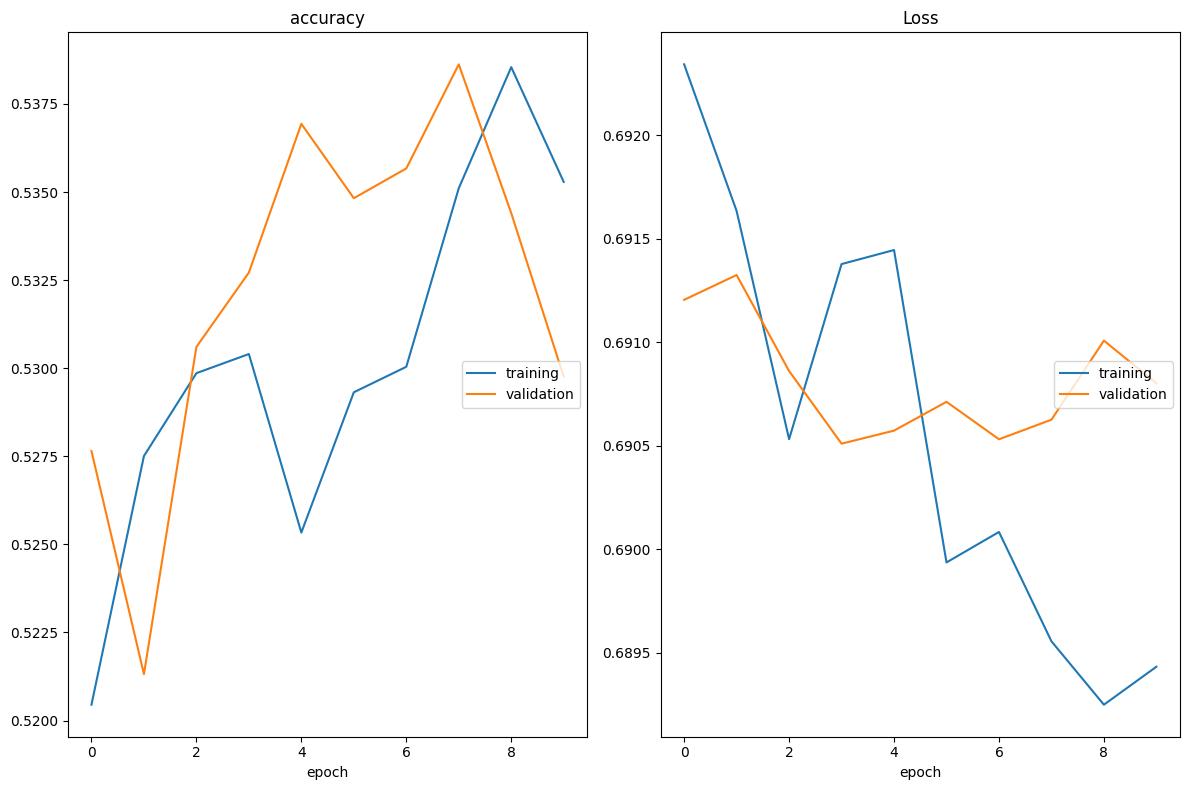

accuracy
	training         	 (min:    0.520, max:    0.539, cur:    0.535)
	validation       	 (min:    0.521, max:    0.539, cur:    0.530)
Loss
	training         	 (min:    0.689, max:    0.692, cur:    0.689)
	validation       	 (min:    0.691, max:    0.691, cur:    0.691)
44/44 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.5302 - loss: 0.6901 - val_accuracy: 0.5298 - val_loss: 0.6908


In [30]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])